In [1]:
from chesslab.agent_torch import agent
from chesslab.agent_random import agent as agent_r
from chesslab.agent_stockfish import agent as s_agent
from chesslab.tests import versus
from chesslab.agent_mcts import agent_MCTS
import chess
import chess.pgn

In [2]:
import torch.nn as nn
class Model_1(nn.Module):

    def __init__(self):
        super().__init__()
        self.func_1=nn.ELU()
        self.func_2=nn.ELU()
        self.func_3=nn.ELU()
        self.func_4=nn.ELU()
        
        self.cnn_1 = nn.Conv2d(3, 32, kernel_size=7,padding=3)
        self.cnn_2 = nn.Conv2d(32, 64, kernel_size=5,padding=2)
        self.cnn_3 = nn.Conv2d(64, 128, kernel_size=3,padding=1)

        self.linear_1 = nn.Linear(8*8*128,256 )
        self.linear_2 = nn.Linear(256, 2)

    def forward(self, x ):
        out = self.cnn_1(x)
        out = self.func_1(out)
        out = self.cnn_2(out)
        out = self.func_2(out)
        out = self.cnn_3(out)
        out = self.func_3(out)
        out = out.reshape([x.size(0), -1])
        out = self.linear_1(out)
        out = self.func_4(out)
        out = self.linear_2(out)

        return out
model = Model_1()

In [3]:
deepbot = agent(model,'../tmp/test_elo.0.5.pt')
randombot = agent_r()

device: cuda


In [4]:
white_wins,black_wins,draws = versus(agent_white=randombot,agent_black=randombot)
print("White wins: {}\nBlack wins: {}\nDraws:{}".format(white_wins,black_wins,draws))

Elapsed time: 4s = 0.1m

Progress:100/100 | White wins: 8 | Black wins: 8 | Draws:84
White wins: 8
Black wins: 8
Draws:84


In [5]:
white_wins,black_wins,draws = versus(agent_white=deepbot,agent_black=randombot)
print("White wins: {}\nBlack wins: {}\nDraws:{}".format(white_wins,black_wins,draws))

Elapsed time: 153s = 2.5m

Progress:100/100 | White wins: 38 | Black wins: 0 | Draws:62
White wins: 38
Black wins: 0
Draws:62


In [6]:
board=chess.Board()
deepMCTS = agent_MCTS(temperature=2,bot=deepbot,game_state=board,verbose=2,max_iter=1000)

In [7]:
white_wins,black_wins,draws = versus(agent_white=deepMCTS,agent_black=randombot,n_counts=10)
print("White wins: {}\nBlack wins: {}\nDraws:{}".format(white_wins,black_wins,draws))

Elapsed time: 436s = 7.3m

MCTS - rollouts:1000 Elapsed time: 1.48s = 0.02m
MCTS - rollouts:1002 Elapsed time: 1.41s = 0.02m
MCTS - rollouts:1001 Elapsed time: 1.49s = 0.02m
MCTS - rollouts:1001 Elapsed time: 1.56s = 0.03m
MCTS - rollouts:1001 Elapsed time: 1.48s = 0.02m
MCTS - rollouts:1001 Elapsed time: 1.42s = 0.02m
MCTS - rollouts:1012 Elapsed time: 1.66s = 0.03m
MCTS - rollouts:1000 Elapsed time: 1.59s = 0.03m
MCTS - rollouts:1000 Elapsed time: 1.48s = 0.02m
MCTS - rollouts:1000 Elapsed time: 1.45s = 0.02m
MCTS - rollouts:1008 Elapsed time: 1.79s = 0.03m
MCTS - rollouts:1000 Elapsed time: 1.54s = 0.03m
MCTS - rollouts:1000 Elapsed time: 1.53s = 0.03m
MCTS - rollouts:1000 Elapsed time: 1.50s = 0.03m
MCTS - rollouts:1000 Elapsed time: 1.52s = 0.03m
MCTS - rollouts:1000 Elapsed time: 1.49s = 0.02m
MCTS - rollouts:1012 Elapsed time: 1.56s = 0.03m
MCTS - rollouts:1006 Elapsed time: 1.48s = 0.02m
MCTS - rollouts:1001 Elapsed time: 1.50s = 0.03m
MCTS - rollouts:1001 Elapsed time: 1.46s = 0.02m
MCTS - rollouts:1000

In [8]:
path = 'E:/database/stockfish_14.exe'
stockfish = s_agent(path,depth=2)
white_wins,black_wins,draws = versus(agent_white=deepMCTS,agent_black=stockfish,n_counts=10)
print("White wins: {}\nBlack wins: {}\nDraws:{}".format(white_wins,black_wins,draws))

Progress:30/100 | White wins: 0 | Black wins: 0 | Draws:3

El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:1000 Elapsed time: 1.54s = 0.03m
MCTS - rollouts:1002 Elapsed time: 1.59s = 0.03m
MCTS - rollouts:1002 Elapsed time: 1.56s = 0.03m
MCTS - rollouts:1000 Elapsed time: 1.57s = 0.03m
MCTS - rollouts:1000 Elapsed time: 1.58s = 0.03m
MCTS - rollouts:1029 Elapsed time: 1.56s = 0.03m
MCTS - rollouts:1001 Elapsed time: 1.62s = 0.03m
MCTS - rollouts:1013 Elapsed time: 1.65s = 0.03m
MCTS - rollouts:1012 Elapsed time: 1.59s = 0.03m
MCTS - rollouts:1000 Elapsed time: 1.54s = 0.03m
MCTS - rollouts:1000 Elapsed time: 1.56s = 0.03m
MCTS - rollouts:1000 Elapsed time: 1.66s = 0.03m
MCTS - rollouts:1021 Elapsed time: 1.53s = 0.03m
MCTS - rollouts:1001 Elapsed time: 1.57s = 0.03m
MCTS - rollouts:1001 Elapsed time: 1.52s = 0.03m
MCTS - rollouts:1001 Elapsed time: 1.63s = 0.03m
MCTS - rollouts:1013 Elapsed time: 1.65s = 0.03m
MCTS - rollouts:1011 Elapsed time: 1.64s = 0.03m
MCTS - rollouts:1016 Elapsed time: 1.

c:\users\daniel\appdata\local\programs\python\python39\lib\site-packages\chesslab\agent_stockfish.py:34: RuntimeWarning: invalid value encountered in true_divide
  score = score/np.max(score)


MCTS - rollouts:1012 Elapsed time: 1.37s = 0.02m
MCTS - rollouts:1012 Elapsed time: 1.45s = 0.02m
MCTS - rollouts:1011 Elapsed time: 1.39s = 0.02m
MCTS - rollouts:1011 Elapsed time: 1.42s = 0.02m
MCTS - rollouts:1011 Elapsed time: 1.40s = 0.02m
MCTS - rollouts:1011 Elapsed time: 1.39s = 0.02m
MCTS - rollouts:1011 Elapsed time: 1.44s = 0.02m
MCTS - rollouts:1010 Elapsed time: 1.55s = 0.03m
MCTS - rollouts:1011 Elapsed time: 1.44s = 0.02m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:1000 Elapsed time: 1.43s = 0.02m
MCTS - rollouts:1002 Elapsed time: 1.44s = 0.02m
MCTS - rollouts:1001 Elapsed time: 1.39s = 0.02m
MCTS - rollouts:1000 Elapsed time: 1.43s = 0.02m
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:1000 Elapsed time: 1.45s = 0.02m
MCTS - rollouts:1029 Elapsed time: 1.43s = 0.02m
MCTS - rollouts:1001 Elapsed time: 1.47s = 0.02m
MCTS - rollouts:1013 Elapsed time: 1.46s = 0.02m
MCTS 

KeyboardInterrupt: 

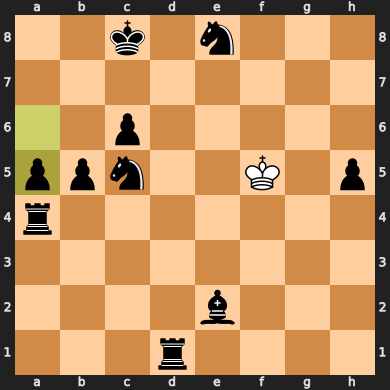

In [9]:
deepMCTS.root.game_state

In [ ]:
board=chess.Board()
board

In [ ]:
game = chess.pgn.Game()
game.headers["White"] = "MCTSBot"
game.headers["Black"] = "Stockfish14"
game.setup(board)  # Not required for the standard
                   # starting position.

blancas=deepMCTS
negras=stockfish

node = game

In [ ]:
import chess.svg
from IPython.display import display

In [ ]:
while not board.is_game_over():
    move=blancas.select_move(board)
    board.push(move)
    node = node.add_variation(move) # Add game node
    if not board.is_game_over():
        move=negras.select_move(board)
        board.push(move)
        node = node.add_variation(move) # Add game node
    #print(board)
    display(chess.svg.board(board,size=350))
    print("=="*8)
game.headers["Result"] = board.result()        
board.result()

In [ ]:
board

In [ ]:
print(game)